In [1]:
import tabnet

2024-04-10 11:07:00.468633: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-10 11:07:03.475874: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [12]:
!pip install pytorch_tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.8 MB/s eta 0:00:00


# Tutorial

In [69]:
# TabNet Acc: import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pytorch_tabnet.tab_model import TabNetRegressor # or from tabnet import TabNetRegressor 
from sklearn.model_selection import KFold
import scipy.io
 
# Read data
mat     = scipy.io.loadmat('./From_test_pool_v1604.mat')
inputs  = mat['data']['in'][0][0]
outputs = mat['data']['out'][0][0]
X = pd.DataFrame(inputs,  columns=["col_{}".format(i) for i in range(inputs.shape[1])])
y = pd.DataFrame(outputs, columns=['res1','res2'])

In [70]:
tabnet.TabNetRegressor

tabnet.tabnet.TabNetRegressor

In [71]:
X

col_0       col_1       col_2       col_3       col_4       col_5  \
0     318.537570 -105.688985 -344.782099  776.301796 -422.124764 -349.252299   
1     331.043792 -106.066452 -325.057207  780.875925 -405.770977 -340.830997   
2     325.220097 -106.740678 -339.710357  777.722674 -433.236777 -365.925475   
3     315.041000 -100.251559 -364.497573  814.283888 -411.104582 -367.199172   
4     327.202995 -102.659730 -336.783640  817.603617 -423.830321 -367.601537   
...          ...         ...         ...         ...         ...         ...   
4995  312.658498 -108.490348 -350.826961  776.732486 -415.718930 -342.191044   
4996  333.808974 -111.618743 -358.315406  756.268801 -433.045223 -370.207437   
4997  322.349713 -111.898039 -330.297291  804.613920 -415.032000 -363.548828   
4998  320.941704 -109.376080 -352.789073  740.130769 -402.333706 -368.692858   
4999  317.307279 -105.163018 -357.287618  750.070604 -418.285415 -358.040925   

           col_6       col_7       col_8       col_9  ...      col_59  \
0     892.480273 -314.072991 -765.183088  833.742853  ... -673.510182   
1     861.915655 -316.604112 -773.849192  796.474642  ... -670.348882   
2     885.879756 -302.301703 -761.395322  794.216045  ... -673.831722   
3     888.625287 -316.603090 -795.967765  876.380577  ... -663.932624   
4     931.636914 -295.274436 -732.291440  838.988254  ... -680.300329   
...          ...         ...         ...         ...  ...         ...   
4995  892.593256 -306.501771 -760.163055  798.573730  ... -671.620917   
4996  926.244264 -295.228612 -721.551561  800.059243  ... -660.437624   
4997  853.023507 -317.629365 -805.332571  841.473202  ... -678.610047   
4998  896.105857 -316.625261 -768.947026  821.369079  ... -661.460364   
4999  907.415014 -301.048090 -756.703210  837.797896  ... -671.132669   

          col_60      col_61       col_62       col_63       col_64  \
0    -797.151793  102.383167   351.377492   705.769464   745.626934   
1    -803.903229  470.845687   978.464027   193.131275   380.666434   
2    -800.956963   56.483612   947.728908  1183.604256   646.327178   
3    -810.366501   10.556329  1424.036500   464.316577   710.433742   
4    -804.427753   40.458445   244.053107   137.972405  1174.084352   
...          ...         ...          ...          ...          ...   
4995 -806.277565  854.572764  1417.694118   461.622975  1247.086226   
4996 -782.266526  211.603579   636.975500   675.417136  1286.907805   
4997 -811.097153  475.953638   310.072152  1281.330362   595.399871   
4998 -807.745470  137.259720   223.818457  1442.211061   485.027785   
4999 -795.625598  430.693792   409.190929  1087.061549  1224.381272   

           col_65     col_66     col_67    col_68  
0     -672.749070  37.912559  44.572019 -0.068508  
1      976.566840  38.236469  42.399777 -0.088507  
2      136.844224  51.441338  30.844137 -0.070826  
3      355.677607  58.454446  30.161479 -0.062253  
4     1235.238752  36.631358  39.560704 -0.094738  
...           ...        ...        ...       ...  
4995  1159.433770  33.790555  41.937085 -0.080447  
4996   875.912466  37.970978  48.243003 -0.073006  
4997  1292.472002  51.349449  54.055874 -0.060540  
4998  1213.311455  31.507366  49.434780 -0.071665  
4999   656.509527  45.271678  53.091571 -0.070216  

[5000 rows x 69 columns]

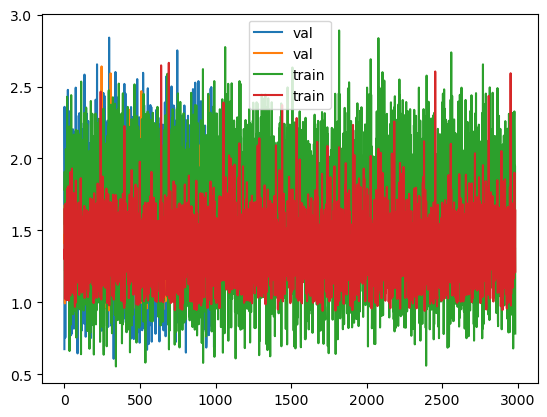

In [85]:
# TabNet Acc: prepare training
from sklearn.model_selection import train_test_split
# split available data in train/test/validation (60/20/20 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)
X_train, X_val,  y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=37)
 
# simplify naming
X_train = X_train.values
X_val   = X_val.values
X_test  = X_test.values
y_train = y_train.values

indices = np.any(y_train > 4, axis=1)
X_train = X_train[~indices]
y_train = y_train[~indices]

y_val   = y_val.values
indices = np.any(y_val > 4, axis=1)
X_val = X_val[~indices]
y_val = y_val[~indices]

"""
y_test  = y_test.values
indices = np.any(y_test > 4, axis=1)
X_test = X_test[~indices]
y_test = y_test[~indices]
"""

plt.plot(y_val, label='val')
plt.plot(y_train, label='train')
#plt.plot(y_test, label='test')
plt.legend()
plt.show()


In [86]:
indices

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [87]:
plt.hist(y_train)
plt.show()

In [88]:
# TabNet Acc: train
# Train, with sklearn syntax
# The model will learn to match (X_train, y_train) and monitor the training with (X_val, y_val)
regressor = TabNetRegressor(seed=42)
regressor.fit(X_train, y_train, eval_set=[(X_val, y_val)], patience=300, max_epochs=2000, eval_metric=['rmse', 'mae', 'mse'])
 
# Evaluate on test data: difference between the regression (X_test -> preds) and the expected data (y_test)
from sklearn.metrics import mean_squared_error
preds = regressor.predict(X_test) # should be close to 'y_test'
test_mse = mean_squared_error(y_pred=preds, y_true=y_test)
print("Final test score: ", test_mse)

/opt/venvs/tensorflow/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.50709 | val_0_rmse: 84.02641| val_0_mae: 80.48755| val_0_mse: 7060.43696|  0:00:00s
epoch 1  | loss: 3.06129 | val_0_rmse: 178.18814| val_0_mae: 132.10004| val_0_mse: 31751.01446|  0:00:00s
epoch 2  | loss: 1.7055  | val_0_rmse: 109.14009| val_0_mae: 100.69735| val_0_mse: 11911.55967|  0:00:00s
epoch 3  | loss: 1.02957 | val_0_rmse: 212.58184| val_0_mae: 210.52457| val_0_mse: 45191.03696|  0:00:00s
epoch 4  | loss: 0.68948 | val_0_rmse: 181.81438| val_0_mae: 181.62491| val_0_mse: 33056.46735|  0:00:00s
epoch 5  | loss: 0.55846 | val_0_rmse: 156.60874| val_0_mae: 156.16101| val_0_mse: 24526.29883|  0:00:00s
epoch 6  | loss: 0.39584 | val_0_rmse: 69.32335| val_0_mae: 42.97304| val_0_mse: 4805.72665|  0:00:00s
epoch 7  | loss: 0.32318 | val_0_rmse: 227.23521| val_0_mae: 224.2206| val_0_mse: 51635.83932|  0:00:00s
epoch 8  | loss: 0.26335 | val_0_rmse: 225.56209| val_0_mae: 212.84448| val_0_mse: 50878.25567|  0:00:01s
epoch 9  | loss: 0.22328 | val_0_rmse: 35.69459| val_

epoch 82 | loss: 0.04463 | val_0_rmse: 5.23152 | val_0_mae: 3.22873 | val_0_mse: 27.36879|  0:00:09s
epoch 83 | loss: 0.0431  | val_0_rmse: 6.47978 | val_0_mae: 3.28413 | val_0_mse: 41.98751|  0:00:09s
epoch 84 | loss: 0.04516 | val_0_rmse: 5.67811 | val_0_mae: 3.03659 | val_0_mse: 32.24088|  0:00:09s
epoch 85 | loss: 0.04303 | val_0_rmse: 5.58076 | val_0_mae: 3.07544 | val_0_mse: 31.14488|  0:00:09s
epoch 86 | loss: 0.04412 | val_0_rmse: 7.31741 | val_0_mae: 3.26323 | val_0_mse: 53.54448|  0:00:10s
epoch 87 | loss: 0.04526 | val_0_rmse: 6.70685 | val_0_mae: 3.13853 | val_0_mse: 44.98184|  0:00:10s
epoch 88 | loss: 0.04386 | val_0_rmse: 7.03535 | val_0_mae: 2.83159 | val_0_mse: 49.49622|  0:00:10s
epoch 89 | loss: 0.04308 | val_0_rmse: 4.89096 | val_0_mae: 2.40634 | val_0_mse: 23.92145|  0:00:10s
epoch 90 | loss: 0.04301 | val_0_rmse: 2.90085 | val_0_mae: 2.09631 | val_0_mse: 8.41494 |  0:00:10s
epoch 91 | loss: 0.04285 | val_0_rmse: 2.60579 | val_0_mae: 1.89924 | val_0_mse: 6.79014 | 

epoch 165| loss: 0.03366 | val_0_rmse: 0.54118 | val_0_mae: 0.43481 | val_0_mse: 0.29288 |  0:00:20s
epoch 166| loss: 0.03363 | val_0_rmse: 0.5568  | val_0_mae: 0.44904 | val_0_mse: 0.31003 |  0:00:20s
epoch 167| loss: 0.03245 | val_0_rmse: 0.56859 | val_0_mae: 0.462   | val_0_mse: 0.3233  |  0:00:20s
epoch 168| loss: 0.03196 | val_0_rmse: 0.53506 | val_0_mae: 0.43375 | val_0_mse: 0.28629 |  0:00:20s
epoch 169| loss: 0.03392 | val_0_rmse: 0.54854 | val_0_mae: 0.44579 | val_0_mse: 0.30089 |  0:00:20s
epoch 170| loss: 0.03223 | val_0_rmse: 0.58659 | val_0_mae: 0.48044 | val_0_mse: 0.34409 |  0:00:20s
epoch 171| loss: 0.03299 | val_0_rmse: 0.55869 | val_0_mae: 0.45294 | val_0_mse: 0.31214 |  0:00:20s
epoch 172| loss: 0.03064 | val_0_rmse: 0.53096 | val_0_mae: 0.42783 | val_0_mse: 0.28192 |  0:00:21s
epoch 173| loss: 0.03298 | val_0_rmse: 0.56249 | val_0_mae: 0.44689 | val_0_mse: 0.3164  |  0:00:21s
epoch 174| loss: 0.0333  | val_0_rmse: 0.57485 | val_0_mae: 0.44653 | val_0_mse: 0.33045 | 

epoch 247| loss: 0.02909 | val_0_rmse: 0.43931 | val_0_mae: 0.28747 | val_0_mse: 0.19299 |  0:00:30s
epoch 248| loss: 0.02798 | val_0_rmse: 0.40932 | val_0_mae: 0.26561 | val_0_mse: 0.16755 |  0:00:30s
epoch 249| loss: 0.02786 | val_0_rmse: 0.38736 | val_0_mae: 0.26265 | val_0_mse: 0.15005 |  0:00:30s
epoch 250| loss: 0.02604 | val_0_rmse: 0.37567 | val_0_mae: 0.2576  | val_0_mse: 0.14113 |  0:00:30s
epoch 251| loss: 0.02788 | val_0_rmse: 0.38912 | val_0_mae: 0.25424 | val_0_mse: 0.15141 |  0:00:30s
epoch 252| loss: 0.02786 | val_0_rmse: 0.37021 | val_0_mae: 0.24488 | val_0_mse: 0.13705 |  0:00:31s
epoch 253| loss: 0.02604 | val_0_rmse: 0.36042 | val_0_mae: 0.24306 | val_0_mse: 0.1299  |  0:00:31s
epoch 254| loss: 0.02658 | val_0_rmse: 0.35192 | val_0_mae: 0.23338 | val_0_mse: 0.12385 |  0:00:31s
epoch 255| loss: 0.02653 | val_0_rmse: 0.34314 | val_0_mae: 0.2238  | val_0_mse: 0.11775 |  0:00:31s
epoch 256| loss: 0.02664 | val_0_rmse: 0.34042 | val_0_mae: 0.21707 | val_0_mse: 0.11588 | 

epoch 330| loss: 0.02398 | val_0_rmse: 0.21397 | val_0_mae: 0.14962 | val_0_mse: 0.04578 |  0:00:41s
epoch 331| loss: 0.02312 | val_0_rmse: 0.21131 | val_0_mae: 0.14723 | val_0_mse: 0.04465 |  0:00:41s
epoch 332| loss: 0.02374 | val_0_rmse: 0.21248 | val_0_mae: 0.14859 | val_0_mse: 0.04515 |  0:00:41s
epoch 333| loss: 0.02256 | val_0_rmse: 0.21287 | val_0_mae: 0.14835 | val_0_mse: 0.04531 |  0:00:41s
epoch 334| loss: 0.02245 | val_0_rmse: 0.21385 | val_0_mae: 0.1486  | val_0_mse: 0.04573 |  0:00:41s
epoch 335| loss: 0.02301 | val_0_rmse: 0.21741 | val_0_mae: 0.15086 | val_0_mse: 0.04727 |  0:00:42s
epoch 336| loss: 0.02249 | val_0_rmse: 0.21355 | val_0_mae: 0.14843 | val_0_mse: 0.0456  |  0:00:42s
epoch 337| loss: 0.0236  | val_0_rmse: 0.2146  | val_0_mae: 0.14966 | val_0_mse: 0.04605 |  0:00:42s
epoch 338| loss: 0.02201 | val_0_rmse: 0.21729 | val_0_mae: 0.1523  | val_0_mse: 0.04721 |  0:00:42s
epoch 339| loss: 0.02339 | val_0_rmse: 0.21298 | val_0_mae: 0.14848 | val_0_mse: 0.04536 | 

epoch 413| loss: 0.02089 | val_0_rmse: 0.19159 | val_0_mae: 0.13381 | val_0_mse: 0.03671 |  0:00:51s
epoch 414| loss: 0.02034 | val_0_rmse: 0.18934 | val_0_mae: 0.13145 | val_0_mse: 0.03585 |  0:00:51s
epoch 415| loss: 0.0203  | val_0_rmse: 0.18957 | val_0_mae: 0.13302 | val_0_mse: 0.03594 |  0:00:51s
epoch 416| loss: 0.02123 | val_0_rmse: 0.19013 | val_0_mae: 0.13165 | val_0_mse: 0.03615 |  0:00:52s
epoch 417| loss: 0.02115 | val_0_rmse: 0.18747 | val_0_mae: 0.13033 | val_0_mse: 0.03515 |  0:00:52s
epoch 418| loss: 0.01987 | val_0_rmse: 0.18637 | val_0_mae: 0.13028 | val_0_mse: 0.03474 |  0:00:52s
epoch 419| loss: 0.01993 | val_0_rmse: 0.18652 | val_0_mae: 0.13027 | val_0_mse: 0.03479 |  0:00:52s
epoch 420| loss: 0.02045 | val_0_rmse: 0.18605 | val_0_mae: 0.13017 | val_0_mse: 0.03461 |  0:00:52s
epoch 421| loss: 0.0205  | val_0_rmse: 0.18785 | val_0_mae: 0.13086 | val_0_mse: 0.03529 |  0:00:52s
epoch 422| loss: 0.02083 | val_0_rmse: 0.18837 | val_0_mae: 0.13135 | val_0_mse: 0.03548 | 

epoch 496| loss: 0.01826 | val_0_rmse: 0.18445 | val_0_mae: 0.1285  | val_0_mse: 0.03402 |  0:01:01s
epoch 497| loss: 0.01861 | val_0_rmse: 0.18454 | val_0_mae: 0.12858 | val_0_mse: 0.03405 |  0:01:01s
epoch 498| loss: 0.01793 | val_0_rmse: 0.18382 | val_0_mae: 0.12711 | val_0_mse: 0.03379 |  0:01:02s
epoch 499| loss: 0.01784 | val_0_rmse: 0.18417 | val_0_mae: 0.12671 | val_0_mse: 0.03392 |  0:01:02s
epoch 500| loss: 0.01798 | val_0_rmse: 0.18478 | val_0_mae: 0.12802 | val_0_mse: 0.03414 |  0:01:02s
epoch 501| loss: 0.01727 | val_0_rmse: 0.18559 | val_0_mae: 0.12795 | val_0_mse: 0.03444 |  0:01:02s
epoch 502| loss: 0.01828 | val_0_rmse: 0.18569 | val_0_mae: 0.12852 | val_0_mse: 0.03448 |  0:01:02s
epoch 503| loss: 0.01805 | val_0_rmse: 0.18597 | val_0_mae: 0.12961 | val_0_mse: 0.03459 |  0:01:02s
epoch 504| loss: 0.0174  | val_0_rmse: 0.18531 | val_0_mae: 0.12852 | val_0_mse: 0.03434 |  0:01:02s
epoch 505| loss: 0.01684 | val_0_rmse: 0.18577 | val_0_mae: 0.12869 | val_0_mse: 0.03451 | 

epoch 579| loss: 0.01584 | val_0_rmse: 0.1811  | val_0_mae: 0.12352 | val_0_mse: 0.0328  |  0:01:11s
epoch 580| loss: 0.01548 | val_0_rmse: 0.18095 | val_0_mae: 0.12535 | val_0_mse: 0.03274 |  0:01:12s
epoch 581| loss: 0.01595 | val_0_rmse: 0.18029 | val_0_mae: 0.12441 | val_0_mse: 0.03251 |  0:01:12s
epoch 582| loss: 0.01541 | val_0_rmse: 0.18058 | val_0_mae: 0.12505 | val_0_mse: 0.03261 |  0:01:12s
epoch 583| loss: 0.01504 | val_0_rmse: 0.18019 | val_0_mae: 0.12496 | val_0_mse: 0.03247 |  0:01:12s
epoch 584| loss: 0.01535 | val_0_rmse: 0.18096 | val_0_mae: 0.12455 | val_0_mse: 0.03275 |  0:01:12s
epoch 585| loss: 0.01578 | val_0_rmse: 0.18016 | val_0_mae: 0.12502 | val_0_mse: 0.03246 |  0:01:12s
epoch 586| loss: 0.01641 | val_0_rmse: 0.1796  | val_0_mae: 0.12385 | val_0_mse: 0.03226 |  0:01:12s
epoch 587| loss: 0.01563 | val_0_rmse: 0.18014 | val_0_mae: 0.12357 | val_0_mse: 0.03245 |  0:01:12s
epoch 588| loss: 0.0158  | val_0_rmse: 0.18054 | val_0_mae: 0.12446 | val_0_mse: 0.0326  | 

epoch 662| loss: 0.01441 | val_0_rmse: 0.17873 | val_0_mae: 0.12325 | val_0_mse: 0.03194 |  0:01:21s
epoch 663| loss: 0.01413 | val_0_rmse: 0.17818 | val_0_mae: 0.12386 | val_0_mse: 0.03175 |  0:01:21s
epoch 664| loss: 0.0144  | val_0_rmse: 0.17867 | val_0_mae: 0.12358 | val_0_mse: 0.03192 |  0:01:21s
epoch 665| loss: 0.01572 | val_0_rmse: 0.17919 | val_0_mae: 0.12459 | val_0_mse: 0.03211 |  0:01:21s
epoch 666| loss: 0.01477 | val_0_rmse: 0.17902 | val_0_mae: 0.12458 | val_0_mse: 0.03205 |  0:01:21s
epoch 667| loss: 0.01407 | val_0_rmse: 0.17768 | val_0_mae: 0.12267 | val_0_mse: 0.03157 |  0:01:21s
epoch 668| loss: 0.01542 | val_0_rmse: 0.17588 | val_0_mae: 0.12157 | val_0_mse: 0.03093 |  0:01:21s
epoch 669| loss: 0.01464 | val_0_rmse: 0.17607 | val_0_mae: 0.12162 | val_0_mse: 0.031   |  0:01:21s
epoch 670| loss: 0.01439 | val_0_rmse: 0.17796 | val_0_mae: 0.12232 | val_0_mse: 0.03167 |  0:01:21s
epoch 671| loss: 0.01498 | val_0_rmse: 0.1773  | val_0_mae: 0.1233  | val_0_mse: 0.03144 | 

epoch 744| loss: 0.01328 | val_0_rmse: 0.17661 | val_0_mae: 0.12389 | val_0_mse: 0.03119 |  0:01:30s
epoch 745| loss: 0.01386 | val_0_rmse: 0.1765  | val_0_mae: 0.12212 | val_0_mse: 0.03115 |  0:01:30s
epoch 746| loss: 0.01285 | val_0_rmse: 0.17871 | val_0_mae: 0.12302 | val_0_mse: 0.03194 |  0:01:30s
epoch 747| loss: 0.01395 | val_0_rmse: 0.17797 | val_0_mae: 0.12411 | val_0_mse: 0.03167 |  0:01:30s
epoch 748| loss: 0.01359 | val_0_rmse: 0.17693 | val_0_mae: 0.1216  | val_0_mse: 0.03131 |  0:01:30s
epoch 749| loss: 0.01453 | val_0_rmse: 0.17748 | val_0_mae: 0.12215 | val_0_mse: 0.0315  |  0:01:31s
epoch 750| loss: 0.01367 | val_0_rmse: 0.17791 | val_0_mae: 0.12387 | val_0_mse: 0.03165 |  0:01:31s
epoch 751| loss: 0.01318 | val_0_rmse: 0.17653 | val_0_mae: 0.1218  | val_0_mse: 0.03116 |  0:01:31s
epoch 752| loss: 0.01404 | val_0_rmse: 0.17551 | val_0_mae: 0.12167 | val_0_mse: 0.0308  |  0:01:31s
epoch 753| loss: 0.014   | val_0_rmse: 0.17549 | val_0_mae: 0.12152 | val_0_mse: 0.0308  | 

epoch 827| loss: 0.01372 | val_0_rmse: 0.17318 | val_0_mae: 0.11855 | val_0_mse: 0.02999 |  0:01:40s
epoch 828| loss: 0.01293 | val_0_rmse: 0.17295 | val_0_mae: 0.1194  | val_0_mse: 0.02991 |  0:01:40s
epoch 829| loss: 0.01341 | val_0_rmse: 0.17237 | val_0_mae: 0.11775 | val_0_mse: 0.02971 |  0:01:40s
epoch 830| loss: 0.01251 | val_0_rmse: 0.17344 | val_0_mae: 0.11877 | val_0_mse: 0.03008 |  0:01:40s
epoch 831| loss: 0.01293 | val_0_rmse: 0.17285 | val_0_mae: 0.11891 | val_0_mse: 0.02988 |  0:01:40s
epoch 832| loss: 0.01319 | val_0_rmse: 0.17354 | val_0_mae: 0.11887 | val_0_mse: 0.03012 |  0:01:40s
epoch 833| loss: 0.01353 | val_0_rmse: 0.17417 | val_0_mae: 0.11863 | val_0_mse: 0.03034 |  0:01:40s
epoch 834| loss: 0.01335 | val_0_rmse: 0.17509 | val_0_mae: 0.1215  | val_0_mse: 0.03066 |  0:01:41s
epoch 835| loss: 0.01287 | val_0_rmse: 0.17478 | val_0_mae: 0.11986 | val_0_mse: 0.03055 |  0:01:41s
epoch 836| loss: 0.01208 | val_0_rmse: 0.17584 | val_0_mae: 0.12057 | val_0_mse: 0.03092 | 

epoch 910| loss: 0.01161 | val_0_rmse: 0.17458 | val_0_mae: 0.11818 | val_0_mse: 0.03048 |  0:01:49s
epoch 911| loss: 0.01138 | val_0_rmse: 0.17493 | val_0_mae: 0.11876 | val_0_mse: 0.0306  |  0:01:50s
epoch 912| loss: 0.01161 | val_0_rmse: 0.17494 | val_0_mae: 0.11841 | val_0_mse: 0.0306  |  0:01:50s
epoch 913| loss: 0.011   | val_0_rmse: 0.17542 | val_0_mae: 0.11854 | val_0_mse: 0.03077 |  0:01:50s
epoch 914| loss: 0.01114 | val_0_rmse: 0.17491 | val_0_mae: 0.11852 | val_0_mse: 0.03059 |  0:01:50s
epoch 915| loss: 0.01143 | val_0_rmse: 0.17368 | val_0_mae: 0.11821 | val_0_mse: 0.03017 |  0:01:50s
epoch 916| loss: 0.0117  | val_0_rmse: 0.17282 | val_0_mae: 0.11854 | val_0_mse: 0.02987 |  0:01:50s
epoch 917| loss: 0.01217 | val_0_rmse: 0.17132 | val_0_mae: 0.11692 | val_0_mse: 0.02935 |  0:01:50s
epoch 918| loss: 0.01115 | val_0_rmse: 0.17119 | val_0_mae: 0.1167  | val_0_mse: 0.0293  |  0:01:50s
epoch 919| loss: 0.01172 | val_0_rmse: 0.17204 | val_0_mae: 0.11808 | val_0_mse: 0.0296  | 

epoch 992| loss: 0.01076 | val_0_rmse: 0.17184 | val_0_mae: 0.11691 | val_0_mse: 0.02953 |  0:01:59s
epoch 993| loss: 0.01076 | val_0_rmse: 0.17272 | val_0_mae: 0.11686 | val_0_mse: 0.02983 |  0:01:59s
epoch 994| loss: 0.01046 | val_0_rmse: 0.17382 | val_0_mae: 0.11889 | val_0_mse: 0.03021 |  0:01:59s
epoch 995| loss: 0.01117 | val_0_rmse: 0.17433 | val_0_mae: 0.11771 | val_0_mse: 0.03039 |  0:01:59s
epoch 996| loss: 0.01234 | val_0_rmse: 0.1749  | val_0_mae: 0.11887 | val_0_mse: 0.03059 |  0:01:59s
epoch 997| loss: 0.01133 | val_0_rmse: 0.17438 | val_0_mae: 0.11894 | val_0_mse: 0.03041 |  0:01:59s
epoch 998| loss: 0.01076 | val_0_rmse: 0.17391 | val_0_mae: 0.11766 | val_0_mse: 0.03024 |  0:01:59s
epoch 999| loss: 0.01141 | val_0_rmse: 0.17318 | val_0_mae: 0.11775 | val_0_mse: 0.02999 |  0:01:59s
epoch 1000| loss: 0.01088 | val_0_rmse: 0.17306 | val_0_mae: 0.11652 | val_0_mse: 0.02995 |  0:01:59s
epoch 1001| loss: 0.01055 | val_0_rmse: 0.17465 | val_0_mae: 0.11872 | val_0_mse: 0.0305  

epoch 1074| loss: 0.0109  | val_0_rmse: 0.17248 | val_0_mae: 0.11611 | val_0_mse: 0.02975 |  0:02:08s
epoch 1075| loss: 0.01022 | val_0_rmse: 0.17293 | val_0_mae: 0.11685 | val_0_mse: 0.0299  |  0:02:08s
epoch 1076| loss: 0.01057 | val_0_rmse: 0.17357 | val_0_mae: 0.11821 | val_0_mse: 0.03013 |  0:02:08s
epoch 1077| loss: 0.01057 | val_0_rmse: 0.17448 | val_0_mae: 0.11907 | val_0_mse: 0.03044 |  0:02:08s
epoch 1078| loss: 0.01071 | val_0_rmse: 0.17575 | val_0_mae: 0.11975 | val_0_mse: 0.03089 |  0:02:08s
epoch 1079| loss: 0.01108 | val_0_rmse: 0.17658 | val_0_mae: 0.1207  | val_0_mse: 0.03118 |  0:02:08s
epoch 1080| loss: 0.01134 | val_0_rmse: 0.17481 | val_0_mae: 0.11871 | val_0_mse: 0.03056 |  0:02:08s
epoch 1081| loss: 0.01007 | val_0_rmse: 0.17382 | val_0_mae: 0.11807 | val_0_mse: 0.03021 |  0:02:08s
epoch 1082| loss: 0.01043 | val_0_rmse: 0.17294 | val_0_mae: 0.1184  | val_0_mse: 0.02991 |  0:02:08s
epoch 1083| loss: 0.0106  | val_0_rmse: 0.1716  | val_0_mae: 0.1166  | val_0_mse: 

epoch 1156| loss: 0.01065 | val_0_rmse: 0.17251 | val_0_mae: 0.11675 | val_0_mse: 0.02976 |  0:02:17s
epoch 1157| loss: 0.01001 | val_0_rmse: 0.17349 | val_0_mae: 0.11738 | val_0_mse: 0.0301  |  0:02:17s
epoch 1158| loss: 0.00966 | val_0_rmse: 0.17398 | val_0_mae: 0.11754 | val_0_mse: 0.03027 |  0:02:17s
epoch 1159| loss: 0.01022 | val_0_rmse: 0.17382 | val_0_mae: 0.11675 | val_0_mse: 0.03021 |  0:02:17s
epoch 1160| loss: 0.00984 | val_0_rmse: 0.17315 | val_0_mae: 0.11586 | val_0_mse: 0.02998 |  0:02:17s
epoch 1161| loss: 0.00975 | val_0_rmse: 0.17271 | val_0_mae: 0.11493 | val_0_mse: 0.02983 |  0:02:17s
epoch 1162| loss: 0.01001 | val_0_rmse: 0.17313 | val_0_mae: 0.11721 | val_0_mse: 0.02997 |  0:02:17s
epoch 1163| loss: 0.01019 | val_0_rmse: 0.17203 | val_0_mae: 0.11448 | val_0_mse: 0.0296  |  0:02:18s
epoch 1164| loss: 0.01006 | val_0_rmse: 0.1716  | val_0_mae: 0.11474 | val_0_mse: 0.02945 |  0:02:18s
epoch 1165| loss: 0.01018 | val_0_rmse: 0.17146 | val_0_mae: 0.11522 | val_0_mse: 

epoch 1238| loss: 0.00902 | val_0_rmse: 0.17256 | val_0_mae: 0.11546 | val_0_mse: 0.02978 |  0:02:26s
epoch 1239| loss: 0.00921 | val_0_rmse: 0.17176 | val_0_mae: 0.11503 | val_0_mse: 0.0295  |  0:02:26s
epoch 1240| loss: 0.00951 | val_0_rmse: 0.17094 | val_0_mae: 0.11528 | val_0_mse: 0.02922 |  0:02:26s
epoch 1241| loss: 0.01003 | val_0_rmse: 0.17122 | val_0_mae: 0.11606 | val_0_mse: 0.02932 |  0:02:26s
epoch 1242| loss: 0.0095  | val_0_rmse: 0.17073 | val_0_mae: 0.11459 | val_0_mse: 0.02915 |  0:02:27s
epoch 1243| loss: 0.00874 | val_0_rmse: 0.1704  | val_0_mae: 0.11523 | val_0_mse: 0.02904 |  0:02:27s
epoch 1244| loss: 0.00899 | val_0_rmse: 0.17066 | val_0_mae: 0.11439 | val_0_mse: 0.02913 |  0:02:27s
epoch 1245| loss: 0.00907 | val_0_rmse: 0.17166 | val_0_mae: 0.11497 | val_0_mse: 0.02947 |  0:02:27s
epoch 1246| loss: 0.00926 | val_0_rmse: 0.17246 | val_0_mae: 0.11613 | val_0_mse: 0.02974 |  0:02:27s
epoch 1247| loss: 0.01005 | val_0_rmse: 0.17135 | val_0_mae: 0.11463 | val_0_mse: 

epoch 1320| loss: 0.0104  | val_0_rmse: 0.1721  | val_0_mae: 0.11478 | val_0_mse: 0.02962 |  0:02:36s
epoch 1321| loss: 0.01001 | val_0_rmse: 0.17321 | val_0_mae: 0.11559 | val_0_mse: 0.03    |  0:02:36s
epoch 1322| loss: 0.00988 | val_0_rmse: 0.17167 | val_0_mae: 0.11439 | val_0_mse: 0.02947 |  0:02:36s
epoch 1323| loss: 0.00964 | val_0_rmse: 0.1711  | val_0_mae: 0.1134  | val_0_mse: 0.02928 |  0:02:36s
epoch 1324| loss: 0.0097  | val_0_rmse: 0.17059 | val_0_mae: 0.11243 | val_0_mse: 0.0291  |  0:02:37s
epoch 1325| loss: 0.00869 | val_0_rmse: 0.17124 | val_0_mae: 0.11347 | val_0_mse: 0.02932 |  0:02:37s
epoch 1326| loss: 0.00946 | val_0_rmse: 0.17117 | val_0_mae: 0.11263 | val_0_mse: 0.0293  |  0:02:37s
epoch 1327| loss: 0.00901 | val_0_rmse: 0.17153 | val_0_mae: 0.11419 | val_0_mse: 0.02942 |  0:02:37s
epoch 1328| loss: 0.0094  | val_0_rmse: 0.17304 | val_0_mae: 0.11534 | val_0_mse: 0.02994 |  0:02:37s
epoch 1329| loss: 0.00894 | val_0_rmse: 0.17387 | val_0_mae: 0.11539 | val_0_mse: 

epoch 1402| loss: 0.0088  | val_0_rmse: 0.17105 | val_0_mae: 0.11356 | val_0_mse: 0.02926 |  0:02:45s
epoch 1403| loss: 0.00856 | val_0_rmse: 0.17266 | val_0_mae: 0.1166  | val_0_mse: 0.02981 |  0:02:45s
epoch 1404| loss: 0.00906 | val_0_rmse: 0.17035 | val_0_mae: 0.11326 | val_0_mse: 0.02902 |  0:02:46s
epoch 1405| loss: 0.00845 | val_0_rmse: 0.16899 | val_0_mae: 0.1122  | val_0_mse: 0.02856 |  0:02:46s
epoch 1406| loss: 0.0087  | val_0_rmse: 0.17037 | val_0_mae: 0.11513 | val_0_mse: 0.02903 |  0:02:46s
epoch 1407| loss: 0.0086  | val_0_rmse: 0.1716  | val_0_mae: 0.11407 | val_0_mse: 0.02945 |  0:02:46s
epoch 1408| loss: 0.00908 | val_0_rmse: 0.17196 | val_0_mae: 0.11417 | val_0_mse: 0.02957 |  0:02:46s
epoch 1409| loss: 0.0084  | val_0_rmse: 0.17183 | val_0_mae: 0.1136  | val_0_mse: 0.02952 |  0:02:46s
epoch 1410| loss: 0.00802 | val_0_rmse: 0.17192 | val_0_mae: 0.11338 | val_0_mse: 0.02955 |  0:02:46s
epoch 1411| loss: 0.0088  | val_0_rmse: 0.17145 | val_0_mae: 0.11405 | val_0_mse: 

epoch 1483| loss: 0.0096  | val_0_rmse: 0.16912 | val_0_mae: 0.11251 | val_0_mse: 0.0286  |  0:02:55s
epoch 1484| loss: 0.00904 | val_0_rmse: 0.17063 | val_0_mae: 0.11381 | val_0_mse: 0.02911 |  0:02:55s
epoch 1485| loss: 0.00924 | val_0_rmse: 0.17155 | val_0_mae: 0.11547 | val_0_mse: 0.02943 |  0:02:55s
epoch 1486| loss: 0.00904 | val_0_rmse: 0.17142 | val_0_mae: 0.11397 | val_0_mse: 0.02939 |  0:02:55s
epoch 1487| loss: 0.00897 | val_0_rmse: 0.17226 | val_0_mae: 0.11429 | val_0_mse: 0.02967 |  0:02:55s
epoch 1488| loss: 0.00906 | val_0_rmse: 0.17198 | val_0_mae: 0.11326 | val_0_mse: 0.02958 |  0:02:55s
epoch 1489| loss: 0.009   | val_0_rmse: 0.16995 | val_0_mae: 0.1119  | val_0_mse: 0.02888 |  0:02:55s
epoch 1490| loss: 0.00877 | val_0_rmse: 0.17072 | val_0_mae: 0.11179 | val_0_mse: 0.02914 |  0:02:55s
epoch 1491| loss: 0.00908 | val_0_rmse: 0.17253 | val_0_mae: 0.11452 | val_0_mse: 0.02977 |  0:02:55s
epoch 1492| loss: 0.00928 | val_0_rmse: 0.17222 | val_0_mae: 0.11382 | val_0_mse: 

/opt/venvs/tensorflow/lib/python3.11/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [89]:
X

col_0       col_1       col_2       col_3       col_4       col_5  \
0     318.537570 -105.688985 -344.782099  776.301796 -422.124764 -349.252299   
1     331.043792 -106.066452 -325.057207  780.875925 -405.770977 -340.830997   
2     325.220097 -106.740678 -339.710357  777.722674 -433.236777 -365.925475   
3     315.041000 -100.251559 -364.497573  814.283888 -411.104582 -367.199172   
4     327.202995 -102.659730 -336.783640  817.603617 -423.830321 -367.601537   
...          ...         ...         ...         ...         ...         ...   
4995  312.658498 -108.490348 -350.826961  776.732486 -415.718930 -342.191044   
4996  333.808974 -111.618743 -358.315406  756.268801 -433.045223 -370.207437   
4997  322.349713 -111.898039 -330.297291  804.613920 -415.032000 -363.548828   
4998  320.941704 -109.376080 -352.789073  740.130769 -402.333706 -368.692858   
4999  317.307279 -105.163018 -357.287618  750.070604 -418.285415 -358.040925   

           col_6       col_7       col_8       col_9  ...      col_59  \
0     892.480273 -314.072991 -765.183088  833.742853  ... -673.510182   
1     861.915655 -316.604112 -773.849192  796.474642  ... -670.348882   
2     885.879756 -302.301703 -761.395322  794.216045  ... -673.831722   
3     888.625287 -316.603090 -795.967765  876.380577  ... -663.932624   
4     931.636914 -295.274436 -732.291440  838.988254  ... -680.300329   
...          ...         ...         ...         ...  ...         ...   
4995  892.593256 -306.501771 -760.163055  798.573730  ... -671.620917   
4996  926.244264 -295.228612 -721.551561  800.059243  ... -660.437624   
4997  853.023507 -317.629365 -805.332571  841.473202  ... -678.610047   
4998  896.105857 -316.625261 -768.947026  821.369079  ... -661.460364   
4999  907.415014 -301.048090 -756.703210  837.797896  ... -671.132669   

          col_60      col_61       col_62       col_63       col_64  \
0    -797.151793  102.383167   351.377492   705.769464   745.626934   
1    -803.903229  470.845687   978.464027   193.131275   380.666434   
2    -800.956963   56.483612   947.728908  1183.604256   646.327178   
3    -810.366501   10.556329  1424.036500   464.316577   710.433742   
4    -804.427753   40.458445   244.053107   137.972405  1174.084352   
...          ...         ...          ...          ...          ...   
4995 -806.277565  854.572764  1417.694118   461.622975  1247.086226   
4996 -782.266526  211.603579   636.975500   675.417136  1286.907805   
4997 -811.097153  475.953638   310.072152  1281.330362   595.399871   
4998 -807.745470  137.259720   223.818457  1442.211061   485.027785   
4999 -795.625598  430.693792   409.190929  1087.061549  1224.381272   

           col_65     col_66     col_67    col_68  
0     -672.749070  37.912559  44.572019 -0.068508  
1      976.566840  38.236469  42.399777 -0.088507  
2      136.844224  51.441338  30.844137 -0.070826  
3      355.677607  58.454446  30.161479 -0.062253  
4     1235.238752  36.631358  39.560704 -0.094738  
...           ...        ...        ...       ...  
4995  1159.433770  33.790555  41.937085 -0.080447  
4996   875.912466  37.970978  48.243003 -0.073006  
4997  1292.472002  51.349449  54.055874 -0.060540  
4998  1213.311455  31.507366  49.434780 -0.071665  
4999   656.509527  45.271678  53.091571 -0.070216  

[5000 rows x 69 columns]

In [44]:
X_test

array([[ 3.32525731e+02, -1.04644317e+02, -3.36847598e+02, ...,
         4.70283589e+01,  4.39246583e+01, -8.62332453e-02],
       [ 3.14794480e+02, -1.09462871e+02, -3.34499643e+02, ...,
         3.36142585e+01,  4.22607335e+01, -7.67718631e-02],
       [ 3.00393690e+02, -1.09987787e+02, -3.29255868e+02, ...,
         3.81125726e+01,  4.94278843e+01, -8.44866726e-02],
       ...,
       [ 3.17684151e+02, -1.09434100e+02, -3.36762928e+02, ...,
         3.66601776e+01,  4.15948580e+01, -8.01291188e-02],
       [ 3.25991169e+02, -1.09306614e+02, -3.61410070e+02, ...,
         3.91384228e+01,  4.93876403e+01, -7.31450990e-02],
       [ 3.24336487e+02, -1.10083728e+02, -3.47959600e+02, ...,
         3.54791410e+01,  4.72827973e+01, -7.48318749e-02]])

In [45]:
X_test.shape

(1000, 69)

In [22]:
y = regressor.predict(X_test) # X is a vector with 69 values

In [23]:
y

array([[2.1452718 , 1.6329834 ],
       [1.4703108 , 1.0289346 ],
       [1.9577343 , 1.1927242 ],
       ...,
       [1.329911  , 1.0410416 ],
       [0.82285684, 1.5039024 ],
       [1.2100147 , 1.1607559 ]], dtype=float32)

In [24]:
y_test

array([[2.27708263, 1.64015909],
       [1.48112191, 1.00691477],
       [1.92089405, 1.11805966],
       ...,
       [1.37331878, 1.01655114],
       [0.79205932, 1.49273011],
       [1.27456681, 1.09328693]])

In [27]:
y.shape

(1000, 2)

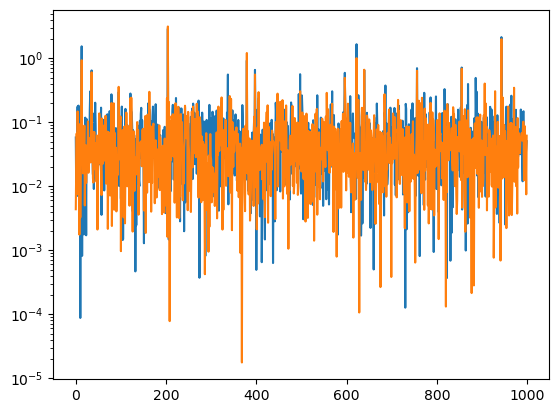

In [34]:
plt.plot(abs((y-y_test)/y_test))
plt.yscale("log")

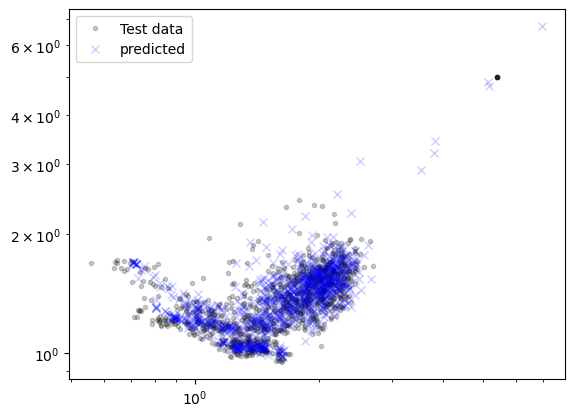

In [54]:

plt.plot(y_test[:, 0], y_test[:, 1], 'k.', alpha=0.2, label="Test data")
plt.plot(y[:, 0], y[:, 1], 'bx', alpha=0.2, label="predicted")
plt.yscale("log")
plt.xscale("log")
plt.legend()

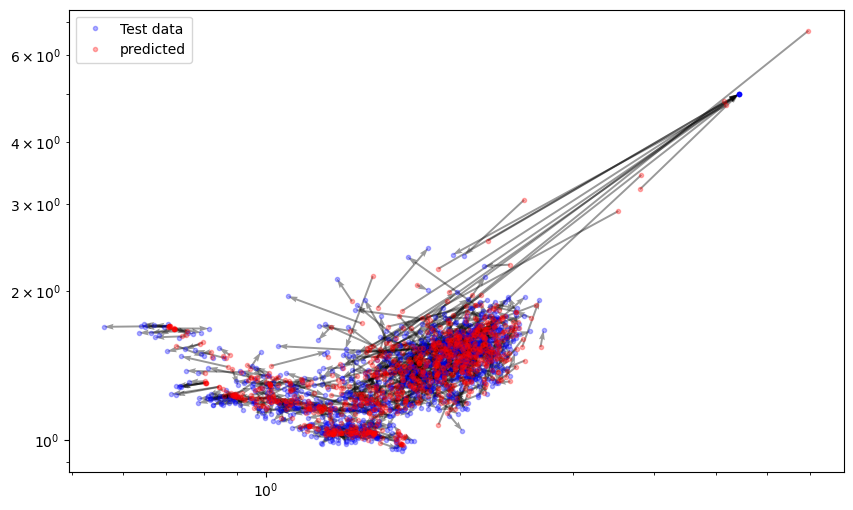

In [66]:
points_start = y
points_end = y_test

differences = points_end - points_start
plt.figure(figsize=(10, 6))
plt.plot(y_test[:, 0], y_test[:, 1], 'b.', alpha=0.3, label="Test data")
plt.plot(y[:, 0], y[:, 1], 'r.', alpha=0.3, label="predicted")
plt.quiver(points_start[:, 0], points_start[:, 1], differences[:, 0], differences[:, 1],
           angles='xy', scale_units='xy', scale=1, width=0.0025, color="black", alpha=0.4)
plt.yscale("log")
plt.xscale("log")
plt.legend()

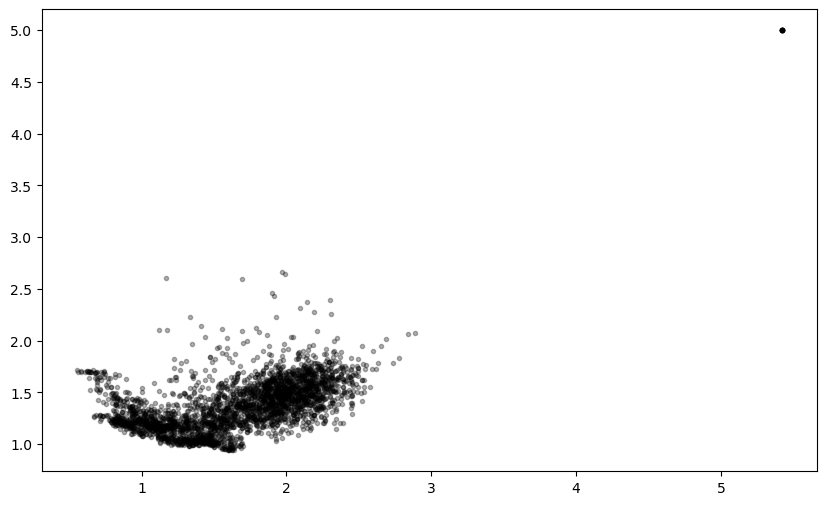

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(y_train[:, 0], y_train[:, 1], 'k.', alpha=0.3, label="Test data")

Redone without outliers

In [94]:
y = regressor.predict(X_test)
#y_test  = y_test.values

points_start = y
points_end = y_test

differences = points_end - points_start
plt.figure(figsize=(10, 6))
plt.plot(y_test[:, 0], y_test[:, 1], 'b.', alpha=0.3, label="Test data")
plt.plot(y[:, 0], y[:, 1], 'r.', alpha=0.3, label="predicted")
plt.quiver(points_start[:, 0], points_start[:, 1], differences[:, 0], differences[:, 1],
           angles='xy', scale_units='xy', scale=1, width=0.0025, color="black", alpha=0.4)
plt.yscale("log")
plt.xscale("log")
plt.legend()

In [97]:
indices = np.any(y_test > 4, axis=1)
X_test_cropped = X_test[~indices]
y_test_cropped = y_test[~indices]

# Evaluate on test data: difference between the regression (X_test -> preds) and the expected data (y_test)
from sklearn.metrics import mean_squared_error
preds = regressor.predict(X_test_cropped) # should be close to 'y_test'
test_mse = mean_squared_error(y_pred=preds, y_true=y_test_cropped)
print("Final test score: ", test_mse)

Final test score:  0.027538374259424472


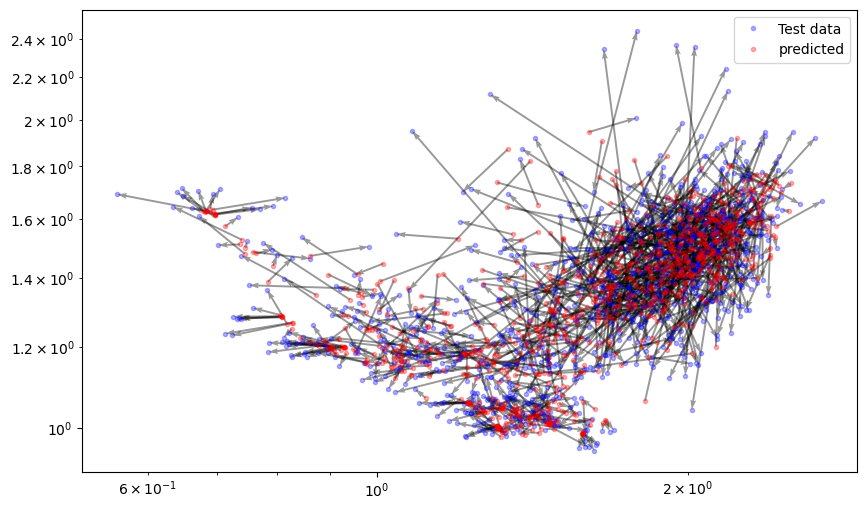

In [99]:
y = regressor.predict(X_test_cropped)
#y_test  = y_test.values

points_start = y
points_end = y_test_cropped

differences = points_end - points_start
plt.figure(figsize=(10, 6))
plt.plot(y_test_cropped[:, 0], y_test_cropped[:, 1], 'b.', alpha=0.3, label="Test data")
plt.plot(y[:, 0], y[:, 1], 'r.', alpha=0.3, label="predicted")
plt.quiver(points_start[:, 0], points_start[:, 1], differences[:, 0], differences[:, 1],
           angles='xy', scale_units='xy', scale=1, width=0.0025, color="black", alpha=0.4)
plt.yscale("log")
plt.xscale("log")
plt.legend()

In [ ]:
vvvvvvvvvvvvv

In [ ]:
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv

In [ ]:
vvvvvvvvvvvvvvvvvvv

In [ ]:
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvv

In [ ]:
from joblib import dump
dump(regressor, 'tabnet_accelerator.joblib')

In [ ]:
from joblib import load
regressor = load('tabnet_accelerator.joblib')